# 探索泰坦尼克号数据集报告

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 一、数据导入

In [7]:
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据字典：

Survival：是否生还（0:否；1:是）

Pclass: 船票级别（1：上等；2：中等；3：下等）

Sex：乘客性别

Age：乘客年龄

Sibsp：兄弟姐妹数量

Parch：父母儿女数量

Ticket：船票编号

Fare： 票价

Cabin：船舱号

Embarked：登船港（C = Cherbourg, Q = Queenstown, S = Southampton）

[来源：kaggle](https://www.kaggle.com/c/titanic/data)

## 二、数据预处理

### 1. 去掉数据中不研究的数据列

In [8]:
# 只探索乘客社会经济地位、性别和年龄对生还率的影响，因此去掉数据中无关列

titanic_df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)


In [9]:
# 查看数据信息

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


### 2. 通过查看数据信息，发现Age列有数据缺失，在此以所有人的年龄平均值进行填充

In [10]:
# 以所有人的年龄平均值对年龄缺失的数据进行填充

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [11]:
# 检查Age列是否还有数据缺失

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


Age列已经没有数据缺失

## 三、问题定义和数据探索

### 1. 计算泰坦尼克号失事后的乘客生还率

0    549
1    342
Name: Survived, dtype: int64


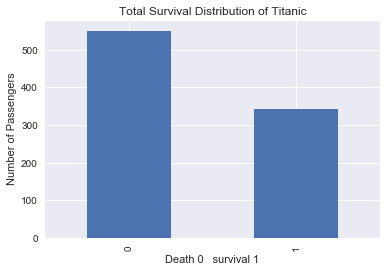

In [15]:
# 查看生还和死亡的数量分布

survived_count = titanic_df['Survived'].value_counts()
print survived_count
survived_count.plot(kind='bar')
plt.xlabel('Death 0   survival 1')
plt.ylabel(' Number of Passengers')
plt.title('Total Survival Distribution of Titanic')

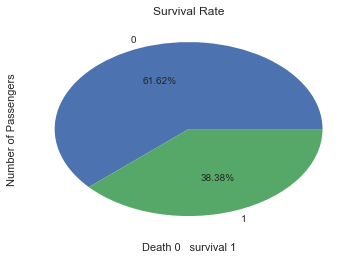

In [18]:
# 计算生还率

titanic_df.groupby('Survived')['PassengerId'].count().plot(kind='pie', autopct='%.2f%%')
plt.xlabel('Death 0   survival 1')
plt.ylabel('Number of Passengers')
plt.title('Survival Rate')

生还率为38.38%

### 2. 持不同级别的船票对乘客能否生还有无影响？
船票的级别可以近似看做该乘客的社会经济地位，此问题即探索在船失事时，救援人员有没有对上等社会的人区别对待。

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


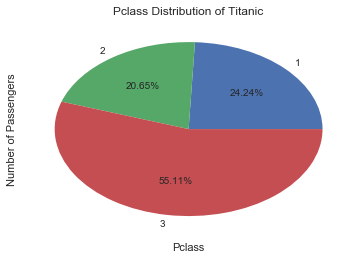

In [17]:
# 首先，看一下乘客社会经济地位的分布情况

pclass_count = titanic_df.groupby('Pclass')['PassengerId'].count()
print pclass_count
pclass_count.plot(kind='pie', autopct ='%.2f%%')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Pclass Distribution of Titanic')

可以看到，乘客中，持最低级船票的人的数量最多

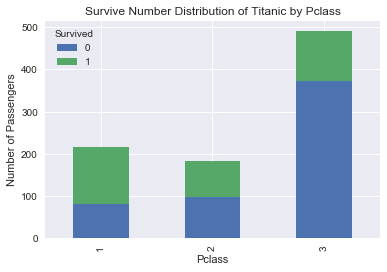

In [19]:
# 可视化不同性别乘客生还和遇难的人数

titanic_df.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of Passengers')
plt.title('Survive Number Distribution of Titanic by Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


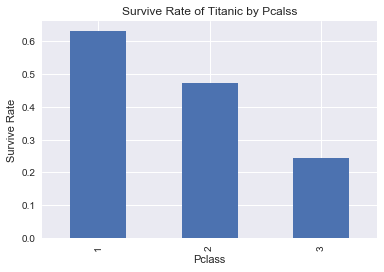

In [17]:
# 探索不同级别船票的乘客分别的生还情况

pclass_df = titanic_df.groupby('Pclass').mean() 
survived_rate = pclass_df['Survived']
survived_rate.plot(kind='bar')
print survived_rate
plt.ylabel('Survive Rate')
plt.title('Survive Rate of Titanic by Pcalss')

可以看到，乘客的生还率与乘客的船票级别正相关，且级别最高的船票乘客的生还率是级别最低船票乘客的2倍多

说明，在船失事后，救援人员对上等社会的人进行了特殊照顾。

### 3. 乘客的性别对乘客能否生还有无影响？
电影中的场景，妇女和小孩上了救生船，应该女性的生还率会比男性的高

Sex
female    314
male      577
Name: PassengerId, dtype: int64


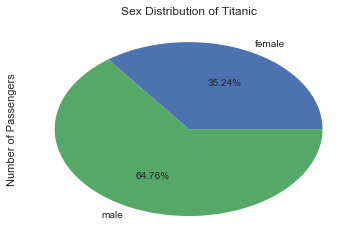

In [20]:
# 首先，看一下乘客的男女比例

sex_count = titanic_df.groupby('Sex')['PassengerId'].count()
print sex_count
sex_count.plot(kind='pie', autopct='%.2f%%')
plt.ylabel('Number of Passengers')
plt.title('Sex Distribution of Titanic')

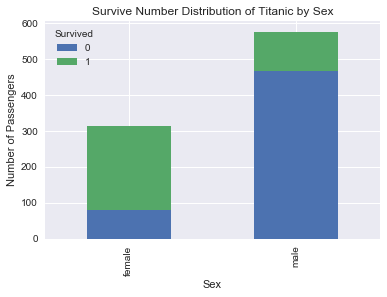

In [21]:
# 可视化不同性别乘客生还和遇难的人数

titanic_df.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of Passengers')
plt.title('Survive Number Distribution of Titanic by Sex')

可以看到，男性乘客要明显多于女性，说明当时的欧洲社会，男性地位还是比女性更高一些。

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


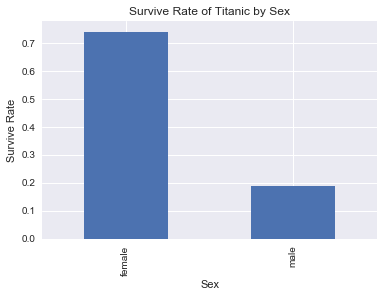

In [19]:
# 探索不同性别的乘客分别的生还情况

pclass_df = titanic_df.groupby('Sex').mean() 
survived_rate = pclass_df['Survived']
survived_rate.plot(kind='bar')
print survived_rate
plt.ylabel('Survive Rate')
plt.title('Survive Rate of Titanic by Sex')

可以看到，女性的生还率要远远高于男性，男性的生存能力本应高于女性，而事实上男性只有18.9%的生还率

说明，在泰坦尼克号失事后，男性乘客主动让出了救生工具。

### 4. 乘客的年龄对乘客能否生还有无影响？
电影中的场景，妇女和小孩上了救生船，应该年龄最小的乘客生还率最高

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
Age_level
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64


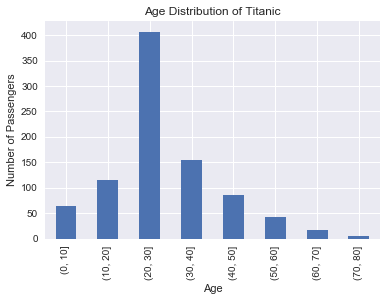

In [23]:
# 首先，看一下乘客的年龄分布

# 查看乘客的年龄属性
print titanic_df['Age'].describe()

# 对年龄进行分组

bins=np.arange(0,90,10)
titanic_df['Age_level'] = pd.cut(titanic_df['Age'], bins)

# 可视化不同分组的人数分布

age_count = titanic_df.groupby('Age_level')['PassengerId'].count()
print age_count
age_count.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic')

可以看到，泰坦尼克号上的乘客年龄主要分布在20到30岁之间。

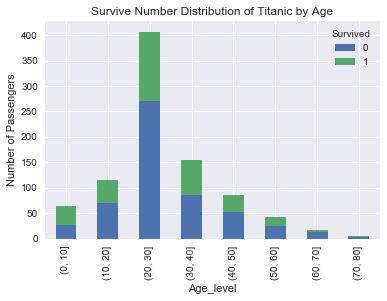

In [24]:
# 可视化不同年龄组的乘客生还和遇难的人数

titanic_df.groupby(['Age_level', 'Survived'])['PassengerId'].count().unstack().plot(kind='bar', stacked=True)
plt.ylabel('Number of Passengers')
plt.title('Survive Number Distribution of Titanic by Age')

Age_level
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


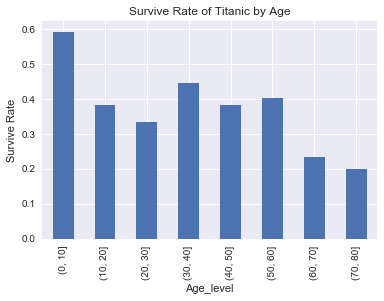

In [25]:
# 探索不同年龄的乘客的生还情况

# 查看生还和遇难乘客的平均年龄

titanic_df.groupby(['Survived'], as_index=False).mean()['Age']

# 探索乘客的生还情况随着年龄的变化

age_df = titanic_df.groupby('Age_level').mean()
age_rate = age_df['Survived']
age_rate.plot(kind='bar')
print age_rate
plt.ylabel('Survive Rate')
plt.title('Survive Rate of Titanic by Age')

- 生还乘客的平均年龄要小于遇难乘客
- 10岁以下的乘客生还率最高，符合电影中的场景

## 四、结论
1. 据样本数据推断，泰坦尼克号失事后的乘客生还率为38.38%；
2. 乘客的生还率与乘客的船票级别正相关。说明，在船失事后，救援人员对上等社会的人进行了特殊照顾；
3. 泰坦尼克号上的男性乘客要明显多于女性，说明当时的欧洲社会，男性地位还是比女性更高一些；
4. 女性的生还率要远远高于男性。说明，在船失事后，男性乘客主动让出了救生工具；
5. 泰坦尼克号上的乘客年龄主要分布在20到30岁之间；
6. 生还乘客的平均年龄要小于遇难乘客；
7. 10岁以下的乘客生还率最高。说明，在船失事后，大人主动让出了救生工具。

## 五、限制
1. 此次数据探索，只是探索的乘客船票级别、性别和年龄与乘客能否生还的相关性，而非因果关系；
2. 此次数据探索，支持基于2224个乘客中的891名乘客数据，可能对总体的描述会存在误差；
3. 此次数据探索基于的891名乘客，并不确定取样的合理性，可能存在误差；
4. 由于年龄数据存在缺失，可能会对结果造成影响。